# Model

The puspose of this notebook is to create a model and all the features that can help to improve the accuracy of such model.

It is been decided to use a Random Forest due to the good results it gives

We will follow the following points:

1. Create the dataframe
2. Times feature engineering
3. Lag Variables
4. Weather feature engineering
5. The function for all the feature engineering
6. Model
    1. First Model (Random Forest)
    2. RandomizedSearchCV Model
    3. Test
7. Visualization

*NOTE: Kindly note that this notebook has been "cleaned up" and all the code has been organized for your easy understanding.*

## 1. Create the dataframe

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from datetime import datetime

In [2]:
#Get the preprocessig_v2.py data path
cwd = os.getcwd()
cwd_list = cwd.split(os.sep)
preprocessing_path = os.path.join(os.sep.join(cwd_list[:-1]), '02-EDA')
preprocessing_path

'/home/gonzalo/Repos/TFM/02-EDA'

In [3]:
#Import preprocessing_v2
%cd $preprocessing_path
import preprocessing_v2 as pre
%cd $cwd

/home/gonzalo/Repos/TFM/02-EDA
/home/gonzalo/Repos/TFM/03-MODEL


**Please, define the datapath where the data have been unziped**

In [4]:
data_path = ''

In [5]:
#Define data path WINDOWS
# data_path = os.path.join(os.sep.join(cwd_list[:-1]), 'DATA')
# data_path

In [6]:
#Define data path LINUX
data_path = '/home/gonzalo/Data/TFM/DATA/'
data_path

'/home/gonzalo/Data/TFM/DATA/'

In [7]:
#Load the df_dock_bikes
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=True )

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [8]:
#Load total bases
df_total_bases = pre.total_bases_dataset(data_path)

In [9]:
#Calculate the occupation rate
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)

In [10]:
#Let's see the statistics
df_total_bases.describe()

28013_total_bases  28004_total_bases  28015_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          238.328810         355.567390         216.459068   
std            40.598753           9.139565           6.742662   
min           110.000000         319.000000         163.000000   
25%           245.000000         350.000000         214.000000   
50%           257.000000         356.000000         218.000000   
75%           261.000000         363.000000         221.000000   
max           269.000000         377.000000         227.000000   

       28005_total_bases  28008_total_bases  28014_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          242.411126         232.113976         228.133876   
std            12.986139           4.689368           7.506474   
min           197.000000         188.000000         184.000000   
25%           235.000000         230.000000         226.000000   
50%           246.000000         233.000000         230.000000   
75%           252.000000         235.000000         233.000000   
max           261.000000         242.000000         240.000000   

       28012_total_bases  28001_total_bases  28009_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          308.651741         267.730891         382.318860   
std            13.164624           9.673565           6.151308   
min           257.000000         189.000000         346.000000   
25%           300.000000         266.000000         379.000000   
50%           311.000000         270.000000         383.000000   
75%           318.000000         272.000000         386.000000   
max           348.000000         279.000000         394.000000   

       28007_total_bases  28006_total_bases  28046_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          209.780416         207.703754         170.377657   
std             3.840044           6.302915          15.303085   
min           184.000000         176.000000          23.000000   
25%           208.000000         206.000000         171.000000   
50%           210.000000         209.000000         173.000000   
75%           212.000000         212.000000         174.000000   
max           217.000000         216.000000         177.000000   

       28045_total_bases  28010_total_bases  28003_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          141.408639          91.929670         159.075758   
std             3.093235           4.285321           4.551289   
min           115.000000          66.000000         133.000000   
25%           140.000000          91.000000         157.000000   
50%           142.000000          93.000000         160.000000   
75%           143.000000          94.000000         162.000000   
max           147.000000          96.000000         167.000000   

       28020_total_bases  28002_total_bases  28036_total_bases  \
count        4422.000000        4422.000000        4422.000000   
mean          161.155812          86.590005          70.592040   
std             5.766466           3.208776           2.757976   
min           116.000000          40.000000          46.000000   
25%           160.000000          86.000000          70.000000   
50%           162.000000          87.000000          71.000000   
75%           164.000000          88.000000          72.000000   
max           168.000000          90.000000          72.000000   

       28016_total_bases  
count        4422.000000  
mean           23.499774  
std             0.733331  
min            20.000000  
25%            23.000000  
50%            24.000000  
75%            24.000000  
max            24.000000

In [11]:
#Let's have a look of the head
df_occupation_rate.head()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2018-08-01              0.485830              0.370387              0.477119   
2018-08-02              0.502940              0.404514              0.481139   
2018-08-03              0.550816              0.446035              0.420614   
2018-08-04              0.479701              0.475740              0.504981   
2018-08-05              0.417175              0.465127              0.445500   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2018-08-01              0.602909              0.426080              0.386879   
2018-08-02              0.614143              0.366510              0.479472   
2018-08-03              0.654341              0.399006              0.444580   
2018-08-04              0.580719              0.454408              0.473976   
2018-08-05              0.453208              0.541930              0.480413   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2018-08-01              0.518685              0.559277              0.525608   
2018-08-02              0.514557              0.438078              0.487971   
2018-08-03              0.593095              0.372398              0.454995   
2018-08-04              0.562042              0.419877              0.526525   
2018-08-05              0.496907              0.537654              0.529196   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2018-08-01              0.539634              0.606152              0.588095   
2018-08-02              0.511259              0.468182              0.634788   
2018-08-03              0.465535              0.572723              0.669497   
2018-08-04              0.490101              0.518484              0.555746   
2018-08-05              0.503265              0.533654              0.499412   

            28016_OccupationRate  
Date                              
2018-08-01              0.256932  
2018-08-02              0.292505  
2018-08-03              0.453307  
2018-08-04              0.491611  
2018-08-05              0.452080

In [12]:
#Let's see the shape
df_occupation_rate.shape

(185, 19)

#### Let's divide the dataset into train, validaton an the other one for test.

In [13]:
train = df_occupation_rate.iloc[:-2]
train.tail(1)

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2019-01-30               0.49992              0.539477              0.449669   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2019-01-30              0.564081              0.499823               0.35353   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2019-01-30               0.39616              0.391428              0.533217   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2019-01-30              0.564052              0.402664              0.478199   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2019-01-30              0.467737              0.395604              0.634541   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2019-01-30              0.442278              0.447394              0.553488   

            28016_OccupationRate  
Date                              
2019-01-30              0.576655

In [14]:
validation = df_occupation_rate[-2:-1]
validation

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2019-01-31               0.54261              0.503579              0.424167   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2019-01-31              0.471588              0.462259              0.368279   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2019-01-31              0.463698              0.434467              0.542292   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2019-01-31               0.48961              0.500886              0.525012   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2019-01-31              0.452748              0.438337               0.57025   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2019-01-31              0.484913              0.433962              0.610229   

            28016_OccupationRate  
Date                              
2019-01-31              0.521336

In [15]:
test = df_occupation_rate[-1:]
test

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2019-02-01              0.482353              0.511111              0.495327   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2019-02-01              0.602362              0.382609              0.323276   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2019-02-01              0.654088              0.114815              0.586563   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2019-02-01              0.578199              0.395238               0.54023   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2019-02-01              0.426573              0.387097              0.559748   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2019-02-01              0.541935              0.386364              0.614286   

            28016_OccupationRate  
Date                              
2019-02-01              0.714286

#### Kindly note that the split is just informative, we will split the dataset before train the model. In the following engineering we will use the train with validations because it is needed the day to predict to get some features

## 2. Times feature engineering

The procedure we are going to follow is the following:

- Make the feature day_month, since it may be important to know if we are at the beginning or end of the month.
- Make the feature back_days, which will be the number of days between the day to predict and the sample.
- Maje the feature weekday which will be divided in two, since in order to keep the information that the sunday is next to monday, we will divide by coordinates where the days of the week will be aroun a circle as a clock.

#### Feature day of month

In [16]:
#Let's keep the test data (last value) for the test
train = df_occupation_rate.iloc[:-1]
train.head()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2018-08-01              0.485830              0.370387              0.477119   
2018-08-02              0.502940              0.404514              0.481139   
2018-08-03              0.550816              0.446035              0.420614   
2018-08-04              0.479701              0.475740              0.504981   
2018-08-05              0.417175              0.465127              0.445500   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2018-08-01              0.602909              0.426080              0.386879   
2018-08-02              0.614143              0.366510              0.479472   
2018-08-03              0.654341              0.399006              0.444580   
2018-08-04              0.580719              0.454408              0.473976   
2018-08-05              0.453208              0.541930              0.480413   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2018-08-01              0.518685              0.559277              0.525608   
2018-08-02              0.514557              0.438078              0.487971   
2018-08-03              0.593095              0.372398              0.454995   
2018-08-04              0.562042              0.419877              0.526525   
2018-08-05              0.496907              0.537654              0.529196   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2018-08-01              0.539634              0.606152              0.588095   
2018-08-02              0.511259              0.468182              0.634788   
2018-08-03              0.465535              0.572723              0.669497   
2018-08-04              0.490101              0.518484              0.555746   
2018-08-05              0.503265              0.533654              0.499412   

            28016_OccupationRate  
Date                              
2018-08-01              0.256932  
2018-08-02              0.292505  
2018-08-03              0.453307  
2018-08-04              0.491611  
2018-08-05              0.452080

In [17]:
#Check how to get the day of the month
print(train.index[2])
train.index[2].day

2018-08-03 00:00:00


3

In [18]:
#Let's make a new column with the day of the month
train['day_month'] = train.index.day
train.head()

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2018-08-01              0.485830              0.370387              0.477119   
2018-08-02              0.502940              0.404514              0.481139   
2018-08-03              0.550816              0.446035              0.420614   
2018-08-04              0.479701              0.475740              0.504981   
2018-08-05              0.417175              0.465127              0.445500   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2018-08-01              0.602909              0.426080              0.386879   
2018-08-02              0.614143              0.366510              0.479472   
2018-08-03              0.654341              0.399006              0.444580   
2018-08-04              0.580719              0.454408              0.473976   
2018-08-05              0.453208              0.541930              0.480413   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2018-08-01              0.518685              0.559277              0.525608   
2018-08-02              0.514557              0.438078              0.487971   
2018-08-03              0.593095              0.372398              0.454995   
2018-08-04              0.562042              0.419877              0.526525   
2018-08-05              0.496907              0.537654              0.529196   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2018-08-01              0.539634              0.606152              0.588095   
2018-08-02              0.511259              0.468182              0.634788   
2018-08-03              0.465535              0.572723              0.669497   
2018-08-04              0.490101              0.518484              0.555746   
2018-08-05              0.503265              0.533654              0.499412   

            28016_OccupationRate  day_month  
Date                                         
2018-08-01              0.256932          1  
2018-08-02              0.292505          2  
2018-08-03              0.453307          3  
2018-08-04              0.491611          4  
2018-08-05              0.452080          5

#### Feature backdays

In [19]:
#Let's see the day to predict
train.index[-1]

Timestamp('2019-01-31 00:00:00', freq='D')

In [20]:
#Let's define the day to predict
date_to_predict =  train.index[-1]

In [21]:
#Therefore, the backdays will be:
diff_dates = date_to_predict - train.index

In [22]:
#And now, it is defined the column with such difference
train['back_days'] = diff_dates.days
train.tail(5)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2019-01-27              0.294570              0.144995              0.413922   
2019-01-28              0.362875              0.214727              0.364462   
2019-01-29              0.455728              0.414503              0.426928   
2019-01-30              0.499920              0.539477              0.449669   
2019-01-31              0.542610              0.503579              0.424167   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2019-01-27              0.494028              0.635569              0.442001   
2019-01-28              0.444240              0.579513              0.436799   
2019-01-29              0.521565              0.454953              0.385853   
2019-01-30              0.564081              0.499823              0.353530   
2019-01-31              0.471588              0.462259              0.368279   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2019-01-27              0.533242              0.379113              0.638596   
2019-01-28              0.486799              0.483771              0.585256   
2019-01-29              0.448913              0.386530              0.505298   
2019-01-30              0.396160              0.391428              0.533217   
2019-01-31              0.463698              0.434467              0.542292   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2019-01-27              0.598933              0.649213              0.573413   
2019-01-28              0.612801              0.535603              0.537184   
2019-01-29              0.645079              0.409149              0.477038   
2019-01-30              0.564052              0.402664              0.478199   
2019-01-31              0.489610              0.500886              0.525012   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2019-01-27              0.655254              0.200867              0.492388   
2019-01-28              0.598872              0.403330              0.628005   
2019-01-29              0.556338              0.474907              0.605469   
2019-01-30              0.467737              0.395604              0.634541   
2019-01-31              0.452748              0.438337              0.570250   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2019-01-27              0.542266              0.637321              0.537703   
2019-01-28              0.568327              0.669752              0.633393   
2019-01-29              0.513465              0.519361              0.645218   
2019-01-30              0.442278              0.447394              0.553488   
2019-01-31              0.484913              0.433962              0.610229   

            28016_OccupationRate  day_month  back_days  
Date                                                    
2019-01-27              0.715044         27          4  
2019-01-28              0.870567         28          3  
2019-01-29              0.799283         29          2  
2019-01-30              0.576655         30          1  
2019-01-31              0.521336         31          0

#### Feature weekday

In [23]:
#Let's check how to get the day of the week
train.index[2].weekday()

4

In [24]:
#Now, we define the coordinates of the each day of the week like a clock

days_of_week = 7

train['sin_weekday'] = np.sin(2*np.pi*train.index.weekday/days_of_week)
train['cos_weekday'] = np.cos(2*np.pi*train.index.weekday/days_of_week)

train.head(14)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   
2018-08-06              0.513362              0.379949              0.546976   
2018-08-07              0.483417              0.389443              0.467139   
2018-08-08              0.397729              0.409967              0.468458   
2018-08-09              0.529459              0.373884              0.393974   
2018-08-10              0.405536              0.445576              0.388308   
2018-08-11              0.371216              0.435309              0.350703   
2018-08-12              0.467117              0.406626              0.464419   
2018-08-13              0.433034              0.401278              0.471027   
2018-08-14              0.567361              0.343576              0.477638   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   
2018-08-06              0.399603              0.424103              0.424583   
2018-08-07              0.445691              0.523320              0.430819   
2018-08-08              0.547779              0.445024              0.360783   
2018-08-09              0.595662              0.494145              0.359331   
2018-08-10              0.576573              0.545717              0.365618   
2018-08-11              0.524567              0.506541              0.471258   
2018-08-12              0.401204              0.405976              0.456218   
2018-08-13              0.450673              0.383666              0.424097   
2018-08-14              0.467288              0.443230              0.397711   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2018-08-01              0.485830              0.370387              0.477119   
2018-08-02              0.502940              0.404514              0.481139   
2018-08-03              0.550816              0.446035              0.420614   
2018-08-04              0.479701              0.475740              0.504981   
2018-08-05              0.417175              0.465127              0.445500   
2018-08-06              0.411680              0.497013              0.441649   
2018-08-07              0.457853              0.433079              0.462348   
2018-08-08              0.589718              0.384924              0.464889   
2018-08-09              0.449710              0.404182              0.496748   
2018-08-10              0.544509              0.414440              0.478312   
2018-08-11              0.500532              0.481074              0.494482   
2018-08-12              0.379367              0.449064              0.520623   
2018-08-13              0.429219              0.442513              0.477615   
2018-08-14              0.526450              0.428146              0.504153   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2018-08-0

In [25]:
#Finally, we define a function for all the times feature engineering
def make_time_features(df):
    date_to_predict =  df.index[-1]
    diff_dates = date_to_predict - df.index
    df['day_month'] = df.index.day
    df['back_days'] = diff_dates.days
    df['sin_weekday'] = np.sin(2*np.pi*df.index.weekday/7)
    df['cos_weekday'] = np.cos(2*np.pi*df.index.weekday/7)
    return df    

## 3. Lag Variables

In this case we will create a variable of how the occuppation rate was yesterday, 7 days before, and 30 days before.

In [26]:
#Let's define the function to create such columns
def lag_function(df, column):
    df[column + '_' + 'lag' + '_' + '1'] = df[column].shift(1)
    df[column + '_' + 'lag' + '_' + '7'] = df[column].shift(7)
    df[column + '_' + 'lag' + '_' + '30'] = df[column].shift(30)
    return df

In [27]:
#Filter the columns with the columns we need thed data
columns = [x for x in train if 'OccupationRate' in x]
columns

['28013_OccupationRate',
 '28004_OccupationRate',
 '28015_OccupationRate',
 '28005_OccupationRate',
 '28008_OccupationRate',
 '28014_OccupationRate',
 '28012_OccupationRate',
 '28001_OccupationRate',
 '28009_OccupationRate',
 '28007_OccupationRate',
 '28006_OccupationRate',
 '28046_OccupationRate',
 '28045_OccupationRate',
 '28010_OccupationRate',
 '28003_OccupationRate',
 '28020_OccupationRate',
 '28002_OccupationRate',
 '28036_OccupationRate',
 '28016_OccupationRate']

In [28]:
#Now we apply the functio for each postal code
for column in columns:
    train = lag_function(train, column)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [29]:
#Let's take a look of the train
train.tail()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2019-01-27              0.294570              0.144995              0.413922   
2019-01-28              0.362875              0.214727              0.364462   
2019-01-29              0.455728              0.414503              0.426928   
2019-01-30              0.499920              0.539477              0.449669   
2019-01-31              0.542610              0.503579              0.424167   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2019-01-27              0.494028              0.635569              0.442001   
2019-01-28              0.444240              0.579513              0.436799   
2019-01-29              0.521565              0.454953              0.385853   
2019-01-30              0.564081              0.499823              0.353530   
2019-01-31              0.471588              0.462259              0.368279   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2019-01-27              0.533242              0.379113              0.638596   
2019-01-28              0.486799              0.483771              0.585256   
2019-01-29              0.448913              0.386530              0.505298   
2019-01-30              0.396160              0.391428              0.533217   
2019-01-31              0.463698              0.434467              0.542292   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2019-01-27              0.598933              0.649213              0.573413   
2019-01-28              0.612801              0.535603              0.537184   
2019-01-29              0.645079              0.409149              0.477038   
2019-01-30              0.564052              0.402664              0.478199   
2019-01-31              0.489610              0.500886              0.525012   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2019-01-27              0.655254              0.200867              0.492388   
2019-01-28              0.598872              0.403330              0.628005   
2019-01-29              0.556338              0.474907              0.605469   
2019-01-30              0.467737              0.395604              0.634541   
2019-01-31              0.452748              0.438337              0.570250   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2019-01-27              0.542266              0.637321              0.537703   
2019-01-28              0.568327              0.669752              0.633393   
2019-01-29              0.513465              0.519361              0.645218   
2019-01-30              0.442278              0.447394              0.553488   
2019-01-31              0.484913              0.433962              0.610229   

            28016_OccupationRate  day_month  back_days  sin_weekday  \
Date                                                                  
2019-01-27              0.715044         27          4    -0.781831   
2019-01-28              0.870567         28          3     0.000000   
2019-01-29              0.799283         29          2     0.781831   
2019-01-30              0.576655         30          1     0.974928   
2019-01-31              0.521336         31          0     0.433884   

            cos_weekday  28013_OccupationRate_lag_1  \
Date                                                  
2019-01-27     0.623490               

#### As the first days do not have data for the lag, it is decided to fill such NaN with 0, in that way we do not lie to the model

In [30]:
train.fillna(0, inplace=True)
train.head(31)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   
2018-08-06              0.513362              0.379949              0.546976   
2018-08-07              0.483417              0.389443              0.467139   
2018-08-08              0.397729              0.409967              0.468458   
2018-08-09              0.529459              0.373884              0.393974   
2018-08-10              0.405536              0.445576              0.388308   
2018-08-11              0.371216              0.435309              0.350703   
2018-08-12              0.467117              0.406626              0.464419   
2018-08-13              0.433034              0.401278              0.471027   
2018-08-14              0.567361              0.343576              0.477638   
2018-08-15              0.494725              0.409771              0.539280   
2018-08-16              0.364212              0.403007              0.517676   
2018-08-17              0.451571              0.330446              0.527576   
2018-08-18              0.441853              0.422568              0.552632   
2018-08-19              0.412834              0.424609              0.479643   
2018-08-20              0.476333              0.452452              0.512249   
2018-08-21              0.517507              0.445442              0.567175   
2018-08-22              0.379179              0.395359              0.543641   
2018-08-23              0.517865              0.274750              0.585447   
2018-08-24              0.421342              0.261762              0.584313   
2018-08-25              0.396996              0.328343              0.500734   
2018-08-26              0.401513              0.321191              0.413730   
2018-08-27              0.416027              0.267220              0.446724   
2018-08-28              0.377962              0.270708              0.348777   
2018-08-29              0.437698              0.274011              0.340645   
2018-08-30              0.415473              0.291667              0.354845   
2018-08-31              0.349992              0.269040              0.393607   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   
2018-08-06              0.399603              0.424103              0.424583   
2018-08-07              0.445691              0.523320              0.430819   
2018-08-08              0.547779              0.445024              0.360783   
2018-08-09              0.595662              0.494145              0.359331   
2018-08-10              0.576573              0.545717              0.365618   
2018-08-11              0.524567              0.506541              0.471258   
2018-08-12              0.401204              0.405976              0.456218   
2018-08-13              0.450673              0.383666              0.424097   
2018-08-14              0.467288              0.443230              0.397711   
2018-08-15              0.360057              0.463063              0.442571   
2018-08-16 

In [31]:
#Let's define function for create the lag variables
def bucle_lag_function(df):
    columns = [x for x in df if 'OccupationRate' in x]
    for column in columns:
        df = lag_function(df, column)
    df.fillna(0, inplace=True)
    return df

## 4. Weather feature engineering

We are going to use the weather data from AEMET for predicting. In this case, we will use rain, temperature, wind and presure, since they seem the kind of features that can help to predict the usage of the bikes

In [32]:
#Open the meteo data
df_weather = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_weather.head()

altitud   dir       fecha horaPresMax horaPresMin horaracha horatmax  \
0      667  22.0  2018-07-29          24          05     11:30    14:10   
1      667  28.0  2018-07-30          09          18     15:00    14:40   
2      667  16.0  2018-07-31          08          18     15:00    14:10   
3      667   4.0  2018-08-01          10          18     00:40    13:50   
4      667   7.0  2018-08-02          08          18     22:50    14:10   

  horatmin  indicativo          nombre prec presMax presMin provincia racha  \
0    16:30        3195  MADRID, RETIRO  0,0   939,9   936,9    MADRID   7,5   
1    05:30        3195  MADRID, RETIRO  0,0   941,2   938,7    MADRID   6,9   
2    04:50        3195  MADRID, RETIRO  0,0   941,8   938,7    MADRID   6,4   
3    05:45        3195  MADRID, RETIRO  0,0   941,1   938,8    MADRID   6,4   
4    06:10        3195  MADRID, RETIRO  0,0   943,8   939,7    MADRID   7,5   

   tmax  tmed  tmin velmedia  
0  32,6  26,2  19,8      1,7  
1  34,1  26,8  19,4      1,4  
2  35,3  28,2  21,1      1,1  
3  37,0  30,2  23,3      0,6  
4  38,5  31,6  24,6      1,1

In [33]:
#Make the date column to datetime type
df_weather['fecha'] = pd.to_datetime(df_weather['fecha'], format='%Y-%m-%d')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 19 columns):
altitud        196 non-null int64
dir            194 non-null float64
fecha          196 non-null datetime64[ns]
horaPresMax    196 non-null object
horaPresMin    196 non-null object
horaracha      194 non-null object
horatmax       196 non-null object
horatmin       196 non-null object
indicativo     196 non-null int64
nombre         196 non-null object
prec           196 non-null object
presMax        196 non-null object
presMin        196 non-null object
provincia      196 non-null object
racha          194 non-null object
tmax           196 non-null object
tmed           196 non-null object
tmin           196 non-null object
velmedia       195 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(15)
memory usage: 29.2+ KB


In [34]:
#Choose the columns we want to add to the data set, besides the date
selected_columns = ['fecha', 'prec', 'presMax', 'tmed', 'velmedia']

In [35]:
#Filter the weather data set with such columns
df_weather_selected = df_weather[selected_columns]
df_weather_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
fecha       196 non-null datetime64[ns]
prec        196 non-null object
presMax     196 non-null object
tmed        196 non-null object
velmedia    195 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 7.7+ KB


#### We have found a problem, as the decimal separetor of the data is coma and not point pandas do not read such data as a number. Therefore, let's define a function to change such type of data

In [36]:
def convert_to_number(x):
    try:
        x = x.replace(',','.')
    except:
        x = 0
    try:
        x = float(x)
    except:
        x = 0
    return x

In [37]:
#And let's apply such function to each column but fecha (date)
for column in [x for x in selected_columns if 'fecha' not in x]:
    print(column)
    df_weather_selected[column] = df_weather_selected[column].apply(convert_to_number)

prec
presMax
tmed
velmedia


/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
#Let's see now the types of data
df_weather_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
fecha       196 non-null datetime64[ns]
prec        196 non-null float64
presMax     196 non-null float64
tmed        196 non-null float64
velmedia    196 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.7 KB


In [39]:
#Now, we can merge the weather data with the dataset
train = train.merge(df_weather_selected[['fecha', 'prec', 'presMax', 'tmed', 'velmedia']], how='left', left_index=True, right_on='fecha')
train.drop('fecha', axis=1, inplace=True)
train.reset_index(drop=True, inplace=True)
train.head()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
0              0.210743              0.229181              0.323946   
1              0.267920              0.285271              0.301801   
2              0.305288              0.232394              0.379323   
3              0.360549              0.189189              0.416667   
4              0.363232              0.363521              0.528096   

   28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
0              0.508977              0.360801              0.350768   
1              0.494181              0.417410              0.379861   
2              0.470126              0.407722              0.457523   
3              0.389521              0.485797              0.424783   
4              0.378999              0.465523              0.366968   

   28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
0              0.485830              0.370387              0.477119   
1              0.502940              0.404514              0.481139   
2              0.550816              0.446035              0.420614   
3              0.479701              0.475740              0.504981   
4              0.417175              0.465127              0.445500   

   28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
0              0.602909              0.426080              0.386879   
1              0.614143              0.366510              0.479472   
2              0.654341              0.399006              0.444580   
3              0.580719              0.454408              0.473976   
4              0.453208              0.541930              0.480413   

   28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
0              0.518685              0.559277              0.525608   
1              0.514557              0.438078              0.487971   
2              0.593095              0.372398              0.454995   
3              0.562042              0.419877              0.526525   
4              0.496907              0.537654              0.529196   

   28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
0              0.539634              0.606152              0.588095   
1              0.511259              0.468182              0.634788   
2              0.465535              0.572723              0.669497   
3              0.490101              0.518484              0.555746   
4              0.503265              0.533654              0.499412   

   28016_OccupationRate  day_month  back_days  sin_weekday  cos_weekday  \
0              0.256932          1        183     0.974928    -0.222521   
1              0.292505          2        182     0.433884    -0.900969   
2              0.453307          3        181    -0.433884    -0.900969   
3              0.491611          4        180    -0.974928    -0.222521   
4              0.452080          5        179    -0.781831     0.623490   

   28013_OccupationRate_lag_1  28013_OccupationRate_lag_7  \
0                    0.000000                         0.0   
1                    0.210743                         0.0   
2                    0.267920                         0.0   
3                    0.305288                         0.0   
4                    0.360549                         0.0   

   28013_OccupationRate_lag_30  28004_OccupationRate_lag_1  \
0                          0.0                    0.000000   
1                          0.0                    0.229181   
2                          0.0                    0.285271   
3                          0.0                    0.232394   
4                          0.0                    0.189189   

   28004_OccupationRate_lag_7  28004_OccupationRate_lag_30  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3 

In [40]:
#As it is seen, somedays it is not recorded the weather data.
#It is been decided to fill such data with the value of the last day, since it is the most likely to happen.
train[['prec', 'presMax', 'tmed', 'velmedia']].fillna(method='ffill', inplace=True)
train[['prec', 'presMax', 'tmed', 'velmedia']]

/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


prec  presMax  tmed  velmedia
0     0.0    941.1  30.2       0.6
1     0.0    943.8  31.6       1.1
2     0.0    942.4  32.9       1.7
3     0.0    943.3  31.0       0.0
4     0.0    942.1  31.0       0.8
5     0.0    941.0  30.6       1.7
6     0.0    937.7  30.7       2.8
7     0.0    937.2  27.9       2.8
8     0.0    943.0  25.4       2.2
9     0.0    945.8  24.4       2.2
10    0.0    945.9  27.9       1.4
11    0.0    942.3  29.2       2.2
12    0.0    938.8  27.5       2.2
13    0.0    941.9  26.3       1.1
14    0.0    941.8  26.7       2.2
15    0.0    940.6  27.5       1.9
16    0.0    943.0  26.1       1.9
17    0.0    943.1  23.6       1.7
18    0.0    944.8  25.8       1.7
19    0.0    944.5  26.6       1.4
20    0.0    942.0  27.7       1.1
21    0.0    942.5  27.4       1.1
22    0.0    942.7  27.0       1.1
23    0.0    943.0  26.8       1.4
24    0.0    940.7  25.8       2.2
25    0.0    941.0  24.4       1.4
26    0.0    940.6  27.8       1.4
27    0.0    940.7  28.0       2.5
28    0.0    942.3  25.8       0.8
29    0.0    944.4  26.4       1.4
30    0.0    942.8  27.3       1.9
31    0.0    943.4  27.3       1.1
32    1.2    942.4  27.5       1.7
33    0.0    937.5  26.8       1.7
34    0.0    938.5  24.4       1.4
35    0.0    939.6  23.0       2.8
36    0.0    939.2  22.6       0.6
37    5.1    940.4  22.2       2.2
38    1.8    942.8  20.2       1.7
39    0.0    945.0  21.0       0.8
40    0.0    947.6  22.8       1.9
41    0.0    948.1  23.0       1.9
42    0.0    946.6  23.2       0.6
43    0.0    944.3  25.4       0.8
44    0.0    943.3  25.5       1.4
45    0.0    944.9  25.1       0.8
46    0.0    945.2  24.1       0.6
47    1.2    943.0  24.7       1.9
48    0.0    942.8  23.4       1.4
49    0.0    945.3  24.2       0.8
50    0.0    945.1  25.7       1.1
51    0.0    944.7  25.1       1.4
52    0.0    946.5  26.2       1.7
53    0.0    948.1  27.2       1.4
54    0.0    948.0  26.0       1.9
55    0.0    947.2  23.2       2.2
56    0.5    952.8  22.5       2.2
57    0.0    952.8  21.0       0.3
58    0.0    947.5  21.9       1.4
59    0.0    942.7  22.4       0.8
60    0.0    942.4  23.0       1.7
61    0.0    945.1  19.8       3.1
62    0.0    947.0  17.3       1.1
63    0.0    948.2  20.5       1.9
64    0.0    944.4  20.2       1.1
65    0.0    942.4  20.4       1.1
66    0.0    941.3  20.4       2.5
67    0.0    942.0  15.4       3.9
68    0.0    942.2  13.8       1.1
69    8.9    939.1  15.1       1.7
70    2.7    934.8  14.6       0.8
71    2.9    942.3  17.2       2.8
72    0.3    946.9  18.3       0.8
73    2.6    944.8  19.6       0.6
74    0.0    934.7  14.8       3.1
75    0.1    936.4  12.3       1.4
76    0.0    941.0  15.4       1.1
77    0.0    941.4  16.5       1.4
78    8.8    935.7  17.2       3.1
79    5.9    940.2  14.8       3.6
80    3.3    944.8  17.2       2.5
81    0.2    945.5  17.8       2.5
82    0.0    947.0  17.0       0.8
83    0.0    949.8  16.8       1.4
84    0.0    949.1  16.2       0.3
85    0.0    944.8  16.6       0.8
86    1.5    941.0  14.2       0.8
87    4.2    936.0   8.8       1.9
88    0.0    928.4   7.0       3.1
89    0.7    928.8   7.0       3.3
90   15.1    928.5   7.5       3.1
91    0.1    931.4   8.9       2.5
92    0.0    942.9   9.2       0.8
93    0.0    946.8  13.6       2.2
94    0.0    946.8  10.6       0.6
95   17.0    941.6  10.0       0.8
96    2.7    931.6   8.2       3.1
97    0.7    937.1   8.9       3.1
98    4.5    941.5  10.6       1.9
99    7.6    941.3   9.8       1.1
100   0.0    943.0   9.0       3.6
101   1.1    939.9  11.6       3.6
102   0.0    939.2  14.2       2.8
103   1.6    943.2  12.2       0.8
104   0.0    947.4  13.0       1.4
105   0.0    947.8  13.0       1.9
106   0.9    942.3  14.2       1.1
107   1.7    942.8  14.0       1.1
108   0.0    940.7  13.8       1.4
109  11.8    934.2  11.5       1.9
110   2.5    926.8  11.2       2.2
111   2.9    929.1  10.0       2.8
112   1.5    938.0   9.2       1.7
113   3.7    93

In [41]:
#Let's take a look of the dataset
train

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
0                0.210743              0.229181              0.323946   
1                0.267920              0.285271              0.301801   
2                0.305288              0.232394              0.379323   
3                0.360549              0.189189              0.416667   
4                0.363232              0.363521              0.528096   
5                0.513362              0.379949              0.546976   
6                0.483417              0.389443              0.467139   
7                0.397729              0.409967              0.468458   
8                0.529459              0.373884              0.393974   
9                0.405536              0.445576              0.388308   
10               0.371216              0.435309              0.350703   
11               0.467117              0.406626              0.464419   
12               0.433034              0.401278              0.471027   
13               0.567361              0.343576              0.477638   
14               0.494725              0.409771              0.539280   
15               0.364212              0.403007              0.517676   
16               0.451571              0.330446              0.527576   
17               0.441853              0.422568              0.552632   
18               0.412834              0.424609              0.479643   
19               0.476333              0.452452              0.512249   
20               0.517507              0.445442              0.567175   
21               0.379179              0.395359              0.543641   
22               0.517865              0.274750              0.585447   
23               0.421342              0.261762              0.584313   
24               0.396996              0.328343              0.500734   
25               0.401513              0.321191              0.413730   
26               0.416027              0.267220              0.446724   
27               0.377962              0.270708              0.348777   
28               0.437698              0.274011              0.340645   
29               0.415473              0.291667              0.354845   
30               0.349992              0.269040              0.393607   
31               0.346365              0.327762              0.462816   
32               0.427070              0.310640              0.449749   
33               0.436893              0.325035              0.430729   
34               0.455436              0.305815              0.372531   
35               0.417633              0.321105              0.407310   
36               0.433568              0.262586              0.384954   
37               0.411159              0.234469              0.361122   
38               0.287130              0.281857              0.489523   
39               0.356830              0.282200              0.337530   
40               0.332975              0.299440              0.332332   
41               0.338782              0.359820              0.358100   
42               0.334744              0.335543              0.421700   
43               0.400753              0.301652              0.453182   
44               0.256874              0.292441              0.382245   
45               0.303025              0.280666              0.395495   
46               0.277631              0.183688              0.302948   
47               0.283839              0.237974              0.400040   
48               0.340549              0.345925              0.486657   
49               0.348735              0.327892              0.476247   
50               0.399513              0.282142              0.421295   
51               0.366804              0.244544              0.459937   
52               0.274648              0.241179              0.372466   
53               0.244742              0.153095              0.

In [42]:
#Finally, let's define the function for add the weather data
def make_weather_features(df, df_weather):
    df_weather['fecha'] = pd.to_datetime(df_weather['fecha'], format='%Y-%m-%d')
    selected_columns = ['fecha', 'prec', 'presMax', 'tmed', 'velmedia']
    df_weather_selected = df_weather[selected_columns]
    for column in [x for x in selected_columns if 'fecha' not in x]:
        df_weather_selected[column] = df_weather_selected[column].apply(convert_to_number)
    df = df.merge(df_weather_selected[['fecha', 'prec', 'presMax', 'tmed', 'velmedia']], how='left', left_index=True, right_on='fecha')
    df.reset_index(drop=True, inplace=True)
    df[['prec', 'presMax', 'tmed', 'velmedia']].fillna(method='ffill', inplace=True)
    return df

## 5. The function for all the feature engineering

In [43]:
#Let's define a function to do all the feature engineering
def feature_engineering(df, df_weather):
    df = make_time_features(df)
    df = bucle_lag_function(df)
    df = make_weather_features(df, df_weather)
    return df

In [44]:
#Load data for check the function
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=False )
df_total_bases = pre.total_bases_dataset(data_path)
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)
df_test_fun_feature_engineering = df_occupation_rate[:-1]
df_test_fun_feature_engineering.head()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
Date                                                                           
2018-08-01              0.210743              0.229181              0.323946   
2018-08-02              0.267920              0.285271              0.301801   
2018-08-03              0.305288              0.232394              0.379323   
2018-08-04              0.360549              0.189189              0.416667   
2018-08-05              0.363232              0.363521              0.528096   

            28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
Date                                                                           
2018-08-01              0.508977              0.360801              0.350768   
2018-08-02              0.494181              0.417410              0.379861   
2018-08-03              0.470126              0.407722              0.457523   
2018-08-04              0.389521              0.485797              0.424783   
2018-08-05              0.378999              0.465523              0.366968   

            28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
Date                                                                           
2018-08-01              0.485830              0.370387              0.477119   
2018-08-02              0.502940              0.404514              0.481139   
2018-08-03              0.550816              0.446035              0.420614   
2018-08-04              0.479701              0.475740              0.504981   
2018-08-05              0.417175              0.465127              0.445500   

            28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
Date                                                                           
2018-08-01              0.602909              0.426080              0.386879   
2018-08-02              0.614143              0.366510              0.479472   
2018-08-03              0.654341              0.399006              0.444580   
2018-08-04              0.580719              0.454408              0.473976   
2018-08-05              0.453208              0.541930              0.480413   

            28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
Date                                                                           
2018-08-01              0.518685              0.559277              0.525608   
2018-08-02              0.514557              0.438078              0.487971   
2018-08-03              0.593095              0.372398              0.454995   
2018-08-04              0.562042              0.419877              0.526525   
2018-08-05              0.496907              0.537654              0.529196   

            28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
Date                                                                           
2018-08-01              0.539634              0.606152              0.588095   
2018-08-02              0.511259              0.468182              0.634788   
2018-08-03              0.465535              0.572723              0.669497   
2018-08-04              0.490101              0.518484              0.555746   
2018-08-05              0.503265              0.533654              0.499412   

            28016_OccupationRate  
Date                              
2018-08-01              0.256932  
2018-08-02              0.292505  
2018-08-03              0.453307  
2018-08-04              0.491611  
2018-08-05              0.452080

In [45]:
#Load the data to check the function
df_weather_test_fun_feature_engineering = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_weather_test_fun_feature_engineering.head(1)

altitud   dir       fecha horaPresMax horaPresMin horaracha horatmax  \
0      667  22.0  2018-07-29          24          05     11:30    14:10   

  horatmin  indicativo          nombre prec presMax presMin provincia racha  \
0    16:30        3195  MADRID, RETIRO  0,0   939,9   936,9    MADRID   7,5   

   tmax  tmed  tmin velmedia  
0  32,6  26,2  19,8      1,7

In [46]:
#Check the function
train_test_fun_feature_engineering = feature_engineering(df_test_fun_feature_engineering, df_weather_test_fun_feature_engineering)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [47]:
#The data should be as the same as train dataset
train_test_fun_feature_engineering.drop('fecha', axis=1, inplace=True)
np.sum(train_test_fun_feature_engineering.values - train.values)

0.0

## Function for create the dataframe with the feature engineering

This function will be modified with the next steps

In [48]:
def create_dataframe(data_path):
    
    df_dock_bikes = pre.make_all_dataset(data_path,'dock_bikes',by_postal_code=True, verbose=False) 
    df_total_bases = pre.total_bases_dataset(data_path)
    
    df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)
    
    df_weather = pd.read_json(os.path.join(data_path, 'METEO.txt'))

    return feature_engineering(df_occupation_rate, df_weather)

In [49]:
df_aux = create_dataframe(data_path)
df_aux.head()

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
0              0.210743              0.229181              0.323946   
1              0.267920              0.285271              0.301801   
2              0.305288              0.232394              0.379323   
3              0.360549              0.189189              0.416667   
4              0.363232              0.363521              0.528096   

   28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
0              0.508977              0.360801              0.350768   
1              0.494181              0.417410              0.379861   
2              0.470126              0.407722              0.457523   
3              0.389521              0.485797              0.424783   
4              0.378999              0.465523              0.366968   

   28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
0              0.485830              0.370387              0.477119   
1              0.502940              0.404514              0.481139   
2              0.550816              0.446035              0.420614   
3              0.479701              0.475740              0.504981   
4              0.417175              0.465127              0.445500   

   28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
0              0.602909              0.426080              0.386879   
1              0.614143              0.366510              0.479472   
2              0.654341              0.399006              0.444580   
3              0.580719              0.454408              0.473976   
4              0.453208              0.541930              0.480413   

   28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
0              0.518685              0.559277              0.525608   
1              0.514557              0.438078              0.487971   
2              0.593095              0.372398              0.454995   
3              0.562042              0.419877              0.526525   
4              0.496907              0.537654              0.529196   

   28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
0              0.539634              0.606152              0.588095   
1              0.511259              0.468182              0.634788   
2              0.465535              0.572723              0.669497   
3              0.490101              0.518484              0.555746   
4              0.503265              0.533654              0.499412   

   28016_OccupationRate  day_month  back_days  sin_weekday  cos_weekday  \
0              0.256932          1        184     0.974928    -0.222521   
1              0.292505          2        183     0.433884    -0.900969   
2              0.453307          3        182    -0.433884    -0.900969   
3              0.491611          4        181    -0.974928    -0.222521   
4              0.452080          5        180    -0.781831     0.623490   

   28013_OccupationRate_lag_1  28013_OccupationRate_lag_7  \
0                    0.000000                         0.0   
1                    0.210743                         0.0   
2                    0.267920                         0.0   
3                    0.305288                         0.0   
4                    0.360549                         0.0   

   28013_OccupationRate_lag_30  28004_OccupationRate_lag_1  \
0                          0.0                    0.000000   
1                          0.0                    0.229181   
2                          0.0                    0.285271   
3                          0.0                    0.232394   
4                          0.0                    0.189189   

   28004_OccupationRate_lag_7  28004_OccupationRate_lag_30  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3 

## 6. Model

### A. First Model

In [50]:
#Choose the columns that correspond to the features
columns = train.columns
X_columns = [x for x in columns if '28' in x and 'lag' in x]
X_columns = X_columns + ['prec', 'presMax', 'tmed', 'velmedia', 'day_month', 'back_days', 'sin_weekday', 'cos_weekday']
X_columns

['28013_OccupationRate_lag_1',
 '28013_OccupationRate_lag_7',
 '28013_OccupationRate_lag_30',
 '28004_OccupationRate_lag_1',
 '28004_OccupationRate_lag_7',
 '28004_OccupationRate_lag_30',
 '28015_OccupationRate_lag_1',
 '28015_OccupationRate_lag_7',
 '28015_OccupationRate_lag_30',
 '28005_OccupationRate_lag_1',
 '28005_OccupationRate_lag_7',
 '28005_OccupationRate_lag_30',
 '28008_OccupationRate_lag_1',
 '28008_OccupationRate_lag_7',
 '28008_OccupationRate_lag_30',
 '28014_OccupationRate_lag_1',
 '28014_OccupationRate_lag_7',
 '28014_OccupationRate_lag_30',
 '28012_OccupationRate_lag_1',
 '28012_OccupationRate_lag_7',
 '28012_OccupationRate_lag_30',
 '28001_OccupationRate_lag_1',
 '28001_OccupationRate_lag_7',
 '28001_OccupationRate_lag_30',
 '28009_OccupationRate_lag_1',
 '28009_OccupationRate_lag_7',
 '28009_OccupationRate_lag_30',
 '28007_OccupationRate_lag_1',
 '28007_OccupationRate_lag_7',
 '28007_OccupationRate_lag_30',
 '28006_OccupationRate_lag_1',
 '28006_OccupationRate_lag_7'

In [51]:
#Choose the columns that correspond to the labels
y_columns = [y for y in columns if '28' in y and 'lag' not in y]
y_columns

['28013_OccupationRate',
 '28004_OccupationRate',
 '28015_OccupationRate',
 '28005_OccupationRate',
 '28008_OccupationRate',
 '28014_OccupationRate',
 '28012_OccupationRate',
 '28001_OccupationRate',
 '28009_OccupationRate',
 '28007_OccupationRate',
 '28006_OccupationRate',
 '28046_OccupationRate',
 '28045_OccupationRate',
 '28010_OccupationRate',
 '28003_OccupationRate',
 '28020_OccupationRate',
 '28002_OccupationRate',
 '28036_OccupationRate',
 '28016_OccupationRate']

In [52]:
#Get rid of the validation data
X = train.iloc[:-1][X_columns]
y = train.iloc[:-1][y_columns]

In [53]:
#Check sizes of the project
print(X.shape)
print(y.shape)

(183, 65)
(183, 19)


In [54]:
#Let's define a function to separate the labels and featueres
def get_X_y(df):
    columns = df.columns
    X_columns = [x for x in columns if '28' in x and 'lag' in x]
    X_columns = X_columns + ['prec', 'presMax', 'tmed', 'velmedia', 'day_month', 'back_days', 'sin_weekday', 'cos_weekday']
    y_columns = [y for y in columns if '28' in y and 'lag' not in y]
    X = df[X_columns]
    y = df[y_columns]
    return (X, y)

In [55]:
#Import random forest
from sklearn.ensemble import RandomForestRegressor

In [56]:
#Let's define the first model
model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=20)

In [57]:
#Fit the model
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [58]:
#Define the validation data
X_validation = train.iloc[-1:][X_columns]
y_real = train.iloc[-1:][y_columns]

In [59]:
#Check size of validation data
print(X_validation.shape)
print(y_real.shape)

(1, 65)
(1, 19)


In [60]:
#Get the prediction of the validation data
y_predicted_validation = model.predict(X_validation)
y_predicted_validation

array([[0.47674742, 0.41458828, 0.46079792, 0.5175523 , 0.46764356,
        0.41373823, 0.54023022, 0.38294193, 0.49164828, 0.5606742 ,
        0.4128493 , 0.43494591, 0.53038162, 0.47898397, 0.50160549,
        0.45331095, 0.46128731, 0.50352172, 0.47687315]])

In [61]:
#Import libraries for metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [62]:
#Function to get all the metrics together
def metrics(y_real, y_predicted):
    mae = mean_absolute_error(y_real, y_predicted)
    print('MAE: %f' % mae)
    mse = mean_squared_error(y_real, y_predicted)
    print('MSE: %f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %f' % rmse)
    
    return mae, mse, rmse

In [63]:
#Get metrics
metrics(y_real, y_predicted_validation)

MAE: 0.058589
MSE: 0.004068
RMSE: 0.063783


(0.05858856847355192, 0.004068239889164672, 0.06378275542154535)

### B. RandomizedSearchCV Model

Now,let's choose the best hyperparametres

In [64]:
#Library
from sklearn.model_selection import GridSearchCV

In [65]:
#Define the model
GridedModel = GridSearchCV(RandomForestRegressor(),
                                    param_grid ={'n_estimators' : [10,30,50,80,100,130,150],
                                                        'max_depth' : [5,10,15,20,25,30,35,40]},
                                    scoring='neg_mean_squared_error',
                                    n_jobs=-1, verbose=2)

In [66]:
#Get the X and y for the grid search
X_GridSearch, y_GridSearch = get_X_y(train)
print(X_GridSearch.shape, y_GridSearch.shape)

(184, 65) (184, 19)


In [67]:
#Fit the model
GridedModel.fit(X_GridSearch, y_GridSearch)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


/home/gonzalo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   24.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50, 80, 100, 130, 150], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [68]:
#Look the best parametrers
GridedModel.best_params_

{'max_depth': 10, 'n_estimators': 130}

In [69]:
#See the best score
GridedModel.best_score_

-0.005838098304037901

In [70]:
#Save the best model
model_hiper = GridedModel.best_estimator_

### C. Test

In [71]:
#Load the data including the test
df_dock_bikes = pre.make_all_dataset(data_path, 'dock_bikes',by_postal_code=True, verbose=False )
df_total_bases = pre.total_bases_dataset(data_path)
df_occupation_rate = pre.make_df_occupation_rate(df_dock_bikes, df_total_bases)
df_weather = pd.read_json(os.path.join(data_path, 'METEO.txt'))
df_test = feature_engineering(df_occupation_rate, df_weather)
print(df_test.shape)
df_test.tail(3)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(185, 85)


28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  \
182              0.499920              0.539477              0.449669   
183              0.542610              0.503579              0.424167   
184              0.482353              0.511111              0.495327   

     28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  \
182              0.564081              0.499823              0.353530   
183              0.471588              0.462259              0.368279   
184              0.602362              0.382609              0.323276   

     28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  \
182              0.396160              0.391428              0.533217   
183              0.463698              0.434467              0.542292   
184              0.654088              0.114815              0.586563   

     28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  \
182              0.564052              0.402664              0.478199   
183              0.489610              0.500886              0.525012   
184              0.578199              0.395238              0.540230   

     28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  \
182              0.467737              0.395604              0.634541   
183              0.452748              0.438337              0.570250   
184              0.426573              0.387097              0.559748   

     28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  \
182              0.442278              0.447394              0.553488   
183              0.484913              0.433962              0.610229   
184              0.541935              0.386364              0.614286   

     28016_OccupationRate  day_month  back_days  sin_weekday  cos_weekday  \
182              0.576655         30          2     0.974928    -0.222521   
183              0.521336         31          1     0.433884    -0.900969   
184              0.714286          1          0    -0.433884    -0.900969   

     28013_OccupationRate_lag_1  28013_OccupationRate_lag_7  \
182                    0.455728                    0.436887   
183                    0.499920                    0.521189   
184                    0.542610                    0.431388   

     28013_OccupationRate_lag_30  28004_OccupationRate_lag_1  \
182                     0.457846                    0.414503   
183                     0.367525                    0.539477   
184                     0.366326                    0.503579   

     28004_OccupationRate_lag_7  28004_OccupationRate_lag_30  \
182                    0.474068                     0.279620   
183                    0.522350                     0.193707   
184                    0.444909                     0.344216   

     28015_OccupationRate_lag_1  28015_OccupationRate_lag_7  \
182                    0.426928                    0.405762   
183                    0.449669                    0.447472   
184                    0.424167                    0.434284   

     28015_OccupationRate_lag_30  28005_OccupationRate_lag_1  \
182                     0.491245                    0.521565   
183                     0.516913                    0.564081   
184                     0.401211                    0.471588   

     28005_OccupationRate_lag_7  28005_OccupationRate_lag_30  \
182                    0.494692                     0.559349   
183                    0.518771                     0.549166   
184                    0.604405                     0.504721   

     28008_OccupationRate_lag_1  28008_OccupationRate_lag_7  \
182                    0.454953                    0.455581   
183                    0.499823                    0.465858   
184                    0.462259                    0.426992   

     28008_OccupationRate_lag_30  28014_OccupationRate_lag_1  \
182                     0.501587                    0.385853   
183                    

In [72]:
#Save the test data
X_test, y_test_real = get_X_y(df_test.iloc[-1:])

In [73]:
#Check shapes
print(X_test.shape)
print(y_test_real.shape)

(1, 65)
(1, 19)


In [74]:
y_test_predicted = model_hiper.predict(X_test)

In [75]:
metrics(y_test_real, y_test_predicted)

MAE: 0.087185
MSE: 0.011081
RMSE: 0.105267


(0.08718505721228191, 0.011081112210500824, 0.10526686188207961)

In [76]:
#Save model
import pickle
pickle.dump(model_hiper, open('model', 'wb'))

## Create the function for the model

In [152]:
def prediction_apply(data_path):
    
    def check_postal_code(cod_postal):
        stations_postal_code_list = ['28013','28004','28015','28005','28008','28014','28012','28001','28009','28007','28006','28046','28045','28010','28003','28020','28002','28036','28016']
        if cod_postal in stations_postal_code_list:
                return 'YES'
        return 'NOT'
    
    #Let's open the data of the postal codes of Madrid
    with open(os.path.join(data_path, 'MADRID.geojson')) as f:
        postal_codes_geo = f.read().splitlines()
        postal_codes_geo = "".join(postal_codes_geo)
        f.close()
    
    model = pickle.load(open('model', 'rb'))

    df = create_dataframe(data_path)

    historical = df.iloc[:-1]
    to_predict = df.iloc[-1:]
    fecha_pred = to_predict['fecha']
    to_predict.drop('fecha', axis=1, inplace=True)
    
    historical['prediction'] = 0

    X, y = get_X_y(to_predict)
    y_predicted = model.predict(X)

    df_y = pd.DataFrame(y_predicted, columns=list(y.columns))
    fecha_pred.reset_index(inplace=True, drop=True)
    X.reset_index(inplace=True, drop=True)

    df_prediction = pd.concat([fecha_pred, X, df_y], axis=1)
    df_prediction['prediction'] = 1

    df_plot = pd.concat([historical, df_prediction])
    df_plot.reset_index(inplace=True, drop=True)


    columns = [x for x in df_plot.columns if 'OccupationRate' in x and 'lag' not in x]
    new_columns = [x[:5] for x in columns] + ['prediction'] + ['fecha']
    columns = columns + ['prediction'] + ['fecha']
    df_plot = df_plot[columns]
    df_plot.columns = new_columns
    df_plot = df_plot.melt(id_vars=['fecha', 'prediction'])


    ### MAPS WITH PREDICTION
    df_y.columns = [x.split('_')[0] for x in df_y.columns]
    df_y = df_y.T
    df_y.columns = ['prediction']

    #Convert string to dict
    postal_codes_geo_dict = json.loads(postal_codes_geo)
    df_postal_codes = gpd.GeoDataFrame.from_features((postal_codes_geo_dict))

    #Add column if such postal code has bike stations
    df_postal_codes['pc_on'] = df_postal_codes['COD_POSTAL'].apply(check_postal_code)
    df_postal_codes = df_postal_codes[['COD_POSTAL', 'geometry', 'pc_on']]
    #Create a dataframe just with the postal codes that have bike stations
    df_postal_codes_on = df_postal_codes[df_postal_codes['pc_on'] == 'YES']

    df_postal_codes_on = df_postal_codes_on.merge(df_y, left_on='COD_POSTAL', right_index=True)

    postal_codes_dict = json.loads(df_postal_codes.to_json())
    postal_codes_dict_on = json.loads(df_postal_codes_on.to_json())

    return df_plot, postal_codes_dict, postal_codes_dict_on

In [153]:
df_plot, postal_codes_dict, postal_codes_dict_on = prediction_apply(data_path)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home

## 7. Visualization

In [130]:
#Libraries
import altair as alt
alt.renderers.enable('notebook')
import json
import geopandas as gpd

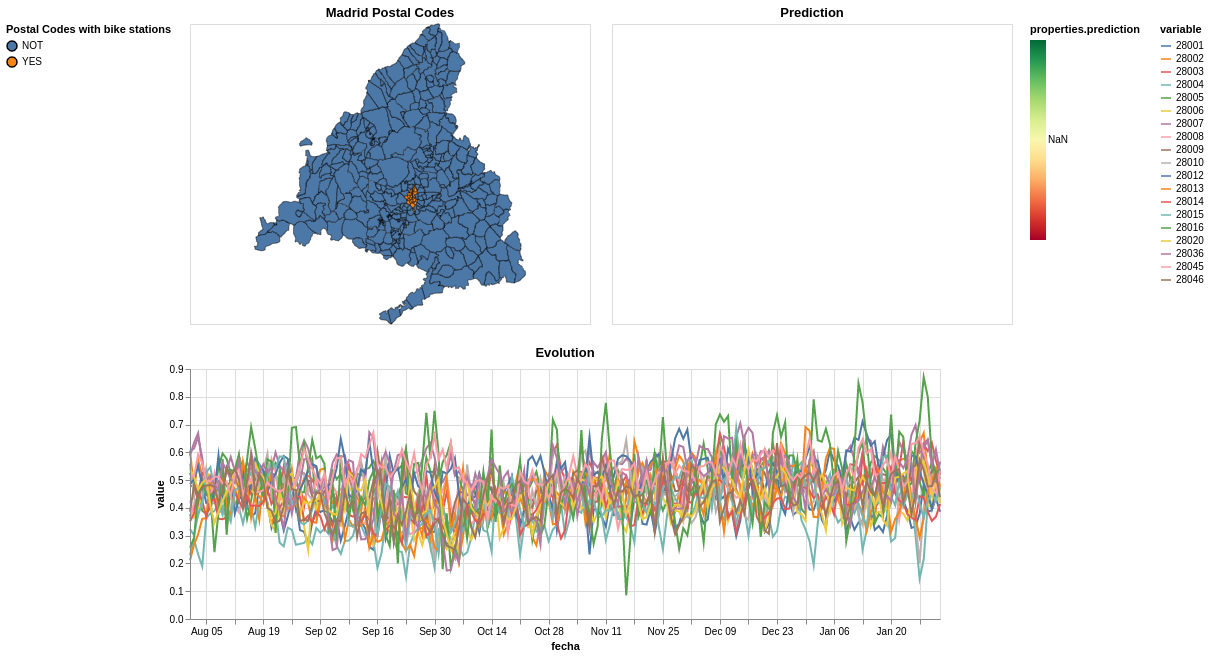

In [151]:
source = alt.Data(values=postal_codes_dict['features'])
source2 = alt.Data(values=postal_codes_dict_on['features'])

width = 750
height = 500

Madrid = alt.Chart(source).mark_geoshape(
        stroke='black',
        strokeWidth=0.5
).encode(
    alt.Color('properties.pc_on',
              type='ordinal',
              scale=alt.Scale(scheme='tableau10'),
              title='Postal Codes with bike stations',
              legend=alt.Legend(orient="left"))
).properties(title="Madrid Postal Codes"
)

Areas = alt.Chart(source2).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    alt.Color('properties.prediction:Q',
              scale=alt.Scale(scheme='redyellowgreen'))
).transform_lookup(
    lookup='properties.COD_POSTAL',
    from_=alt.LookupData(df_plot, key='variable',
                        fields=['prediction', 'height'])
).properties(title="Prediction"
)


time_serie = alt.Chart(df_plot).mark_line().encode(
    x='fecha:T',
    y='value:Q',
    color = alt.Color('variable:N',
              scale=alt.Scale(scheme='tableau10')),
    tooltip='value:Q'
).properties(title='Evolution', width=width, height=height/2
)


(Madrid | Areas) & time_serie

He conseguido poner el lookup usando los dos dataframes
ahora habra que ver si se puede filtrar